# E10 - SOFI Reconstruction Convergence Sample Analysis

This notebook is a sample analysis for [demo E9](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/E9_ReconstructionConvergence.ipynb). The moment-reconstructed images for videos with increasing frame numbers are saved in one .npy files and passed to E9 for reconstruction convergence exploration.

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from pysofi import reconstruction
from pysofi import (filtering, masks, finterp)
import tifffile as tiff
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# define a function to display the cumulant images up to 7th order
def check_cumulants(k_frame):
# gamma display reconstructions
    fig, axs = plt.subplots(2,3,figsize=(40,30))
    for i in range(2,8):
        row = (i - 2) // 3
        ax = axs[row,i-2-row*3]
        img = ax.imshow((2*(k_frame[i]>0)-1)*abs(k_frame[i])**0.9**(i+1))
        ax.tick_params(axis='x', labelsize= 30)
        ax.tick_params(axis='y', labelsize= 30)
        ax.set_title(f'Order = {i}', fontsize=35)
        cb = plt.colorbar(img, ax=ax)
        cb.ax.tick_params(labelsize=30)
        cb.ax.yaxis.get_offset_text().set_fontsize(30)

In [3]:
# define the file path and file name fo rthe testing dataset
filepath = '../sampledata/simulations/convergence_demo'
filename = 'nobleach_frame20000_3.tif'

[==============================] 100.0%



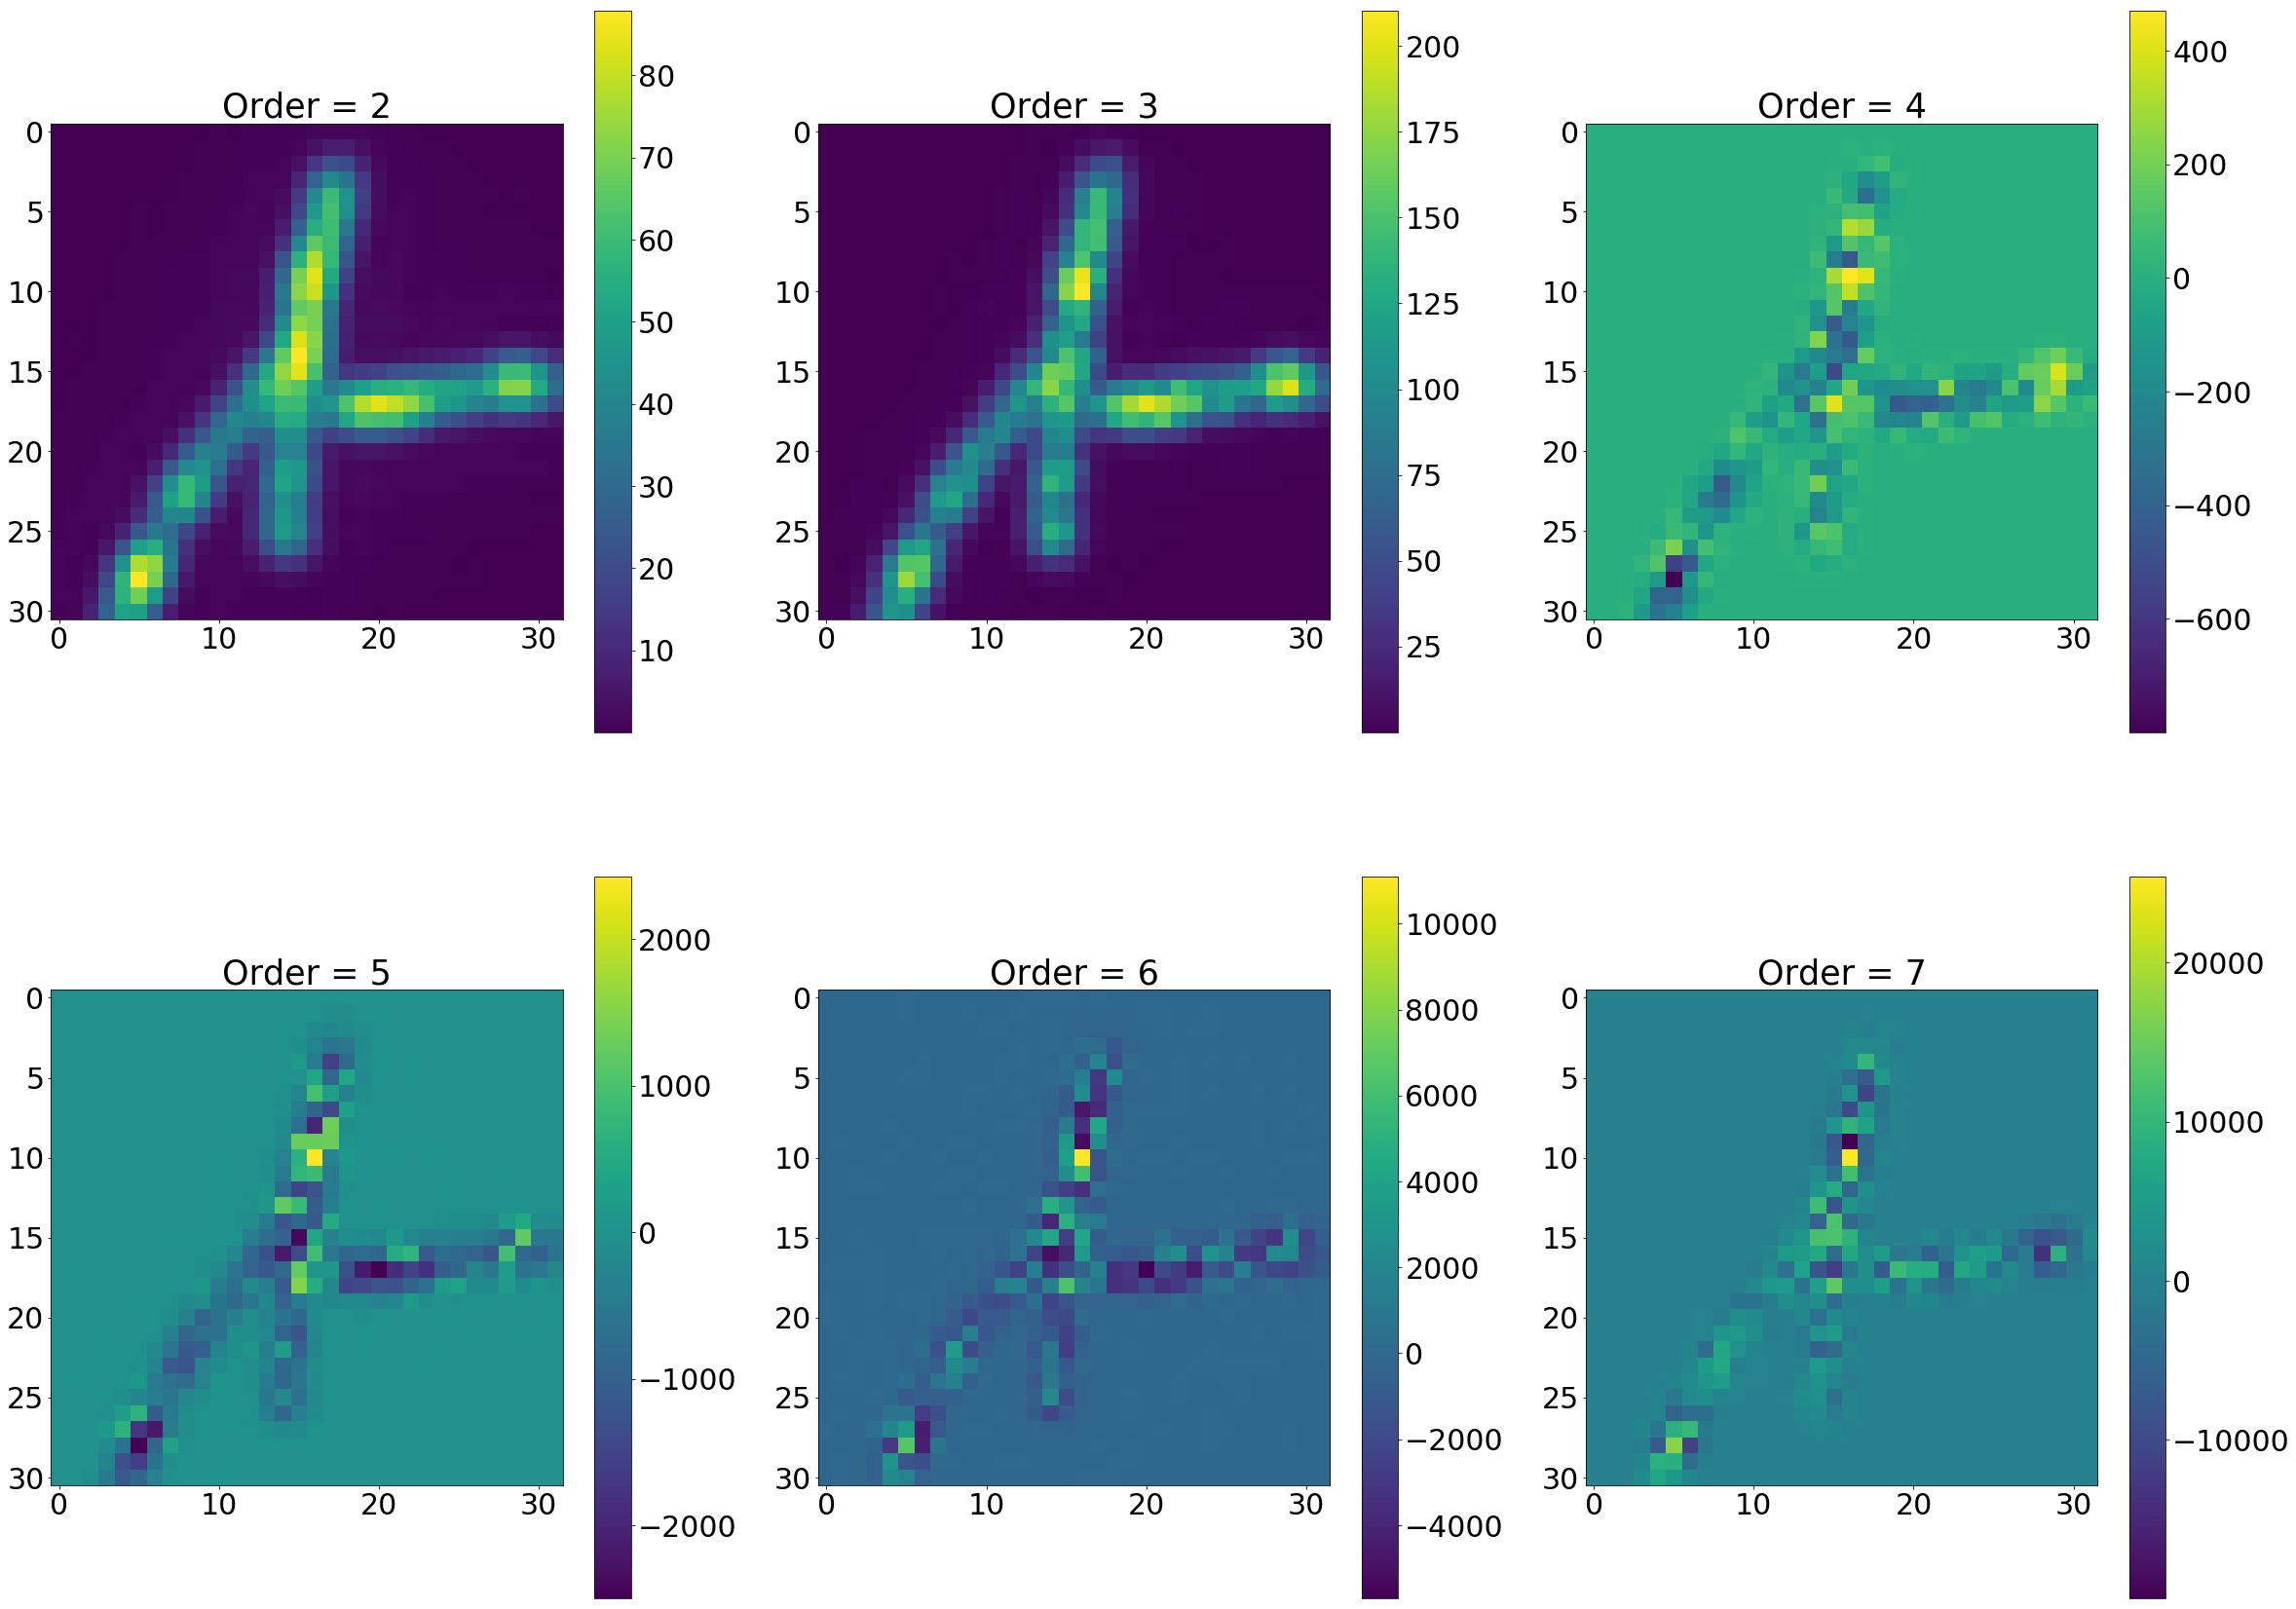

In [4]:
# calcualte the cumulant images using frames in the range of 0 to 1000 (1000 frames in total)
m_frame1000 = reconstruction.calc_block_moments(filepath, filename, 7, frames=[0,1000])
k_frame1000 = reconstruction.calc_cumulants_from_moments(m_frame1000)

# visualize the calculate cumulants using frames in the range of 0 to 1000 (1000 frames in total)
check_cumulants(k_frame1000)

[==============================] 100.0%



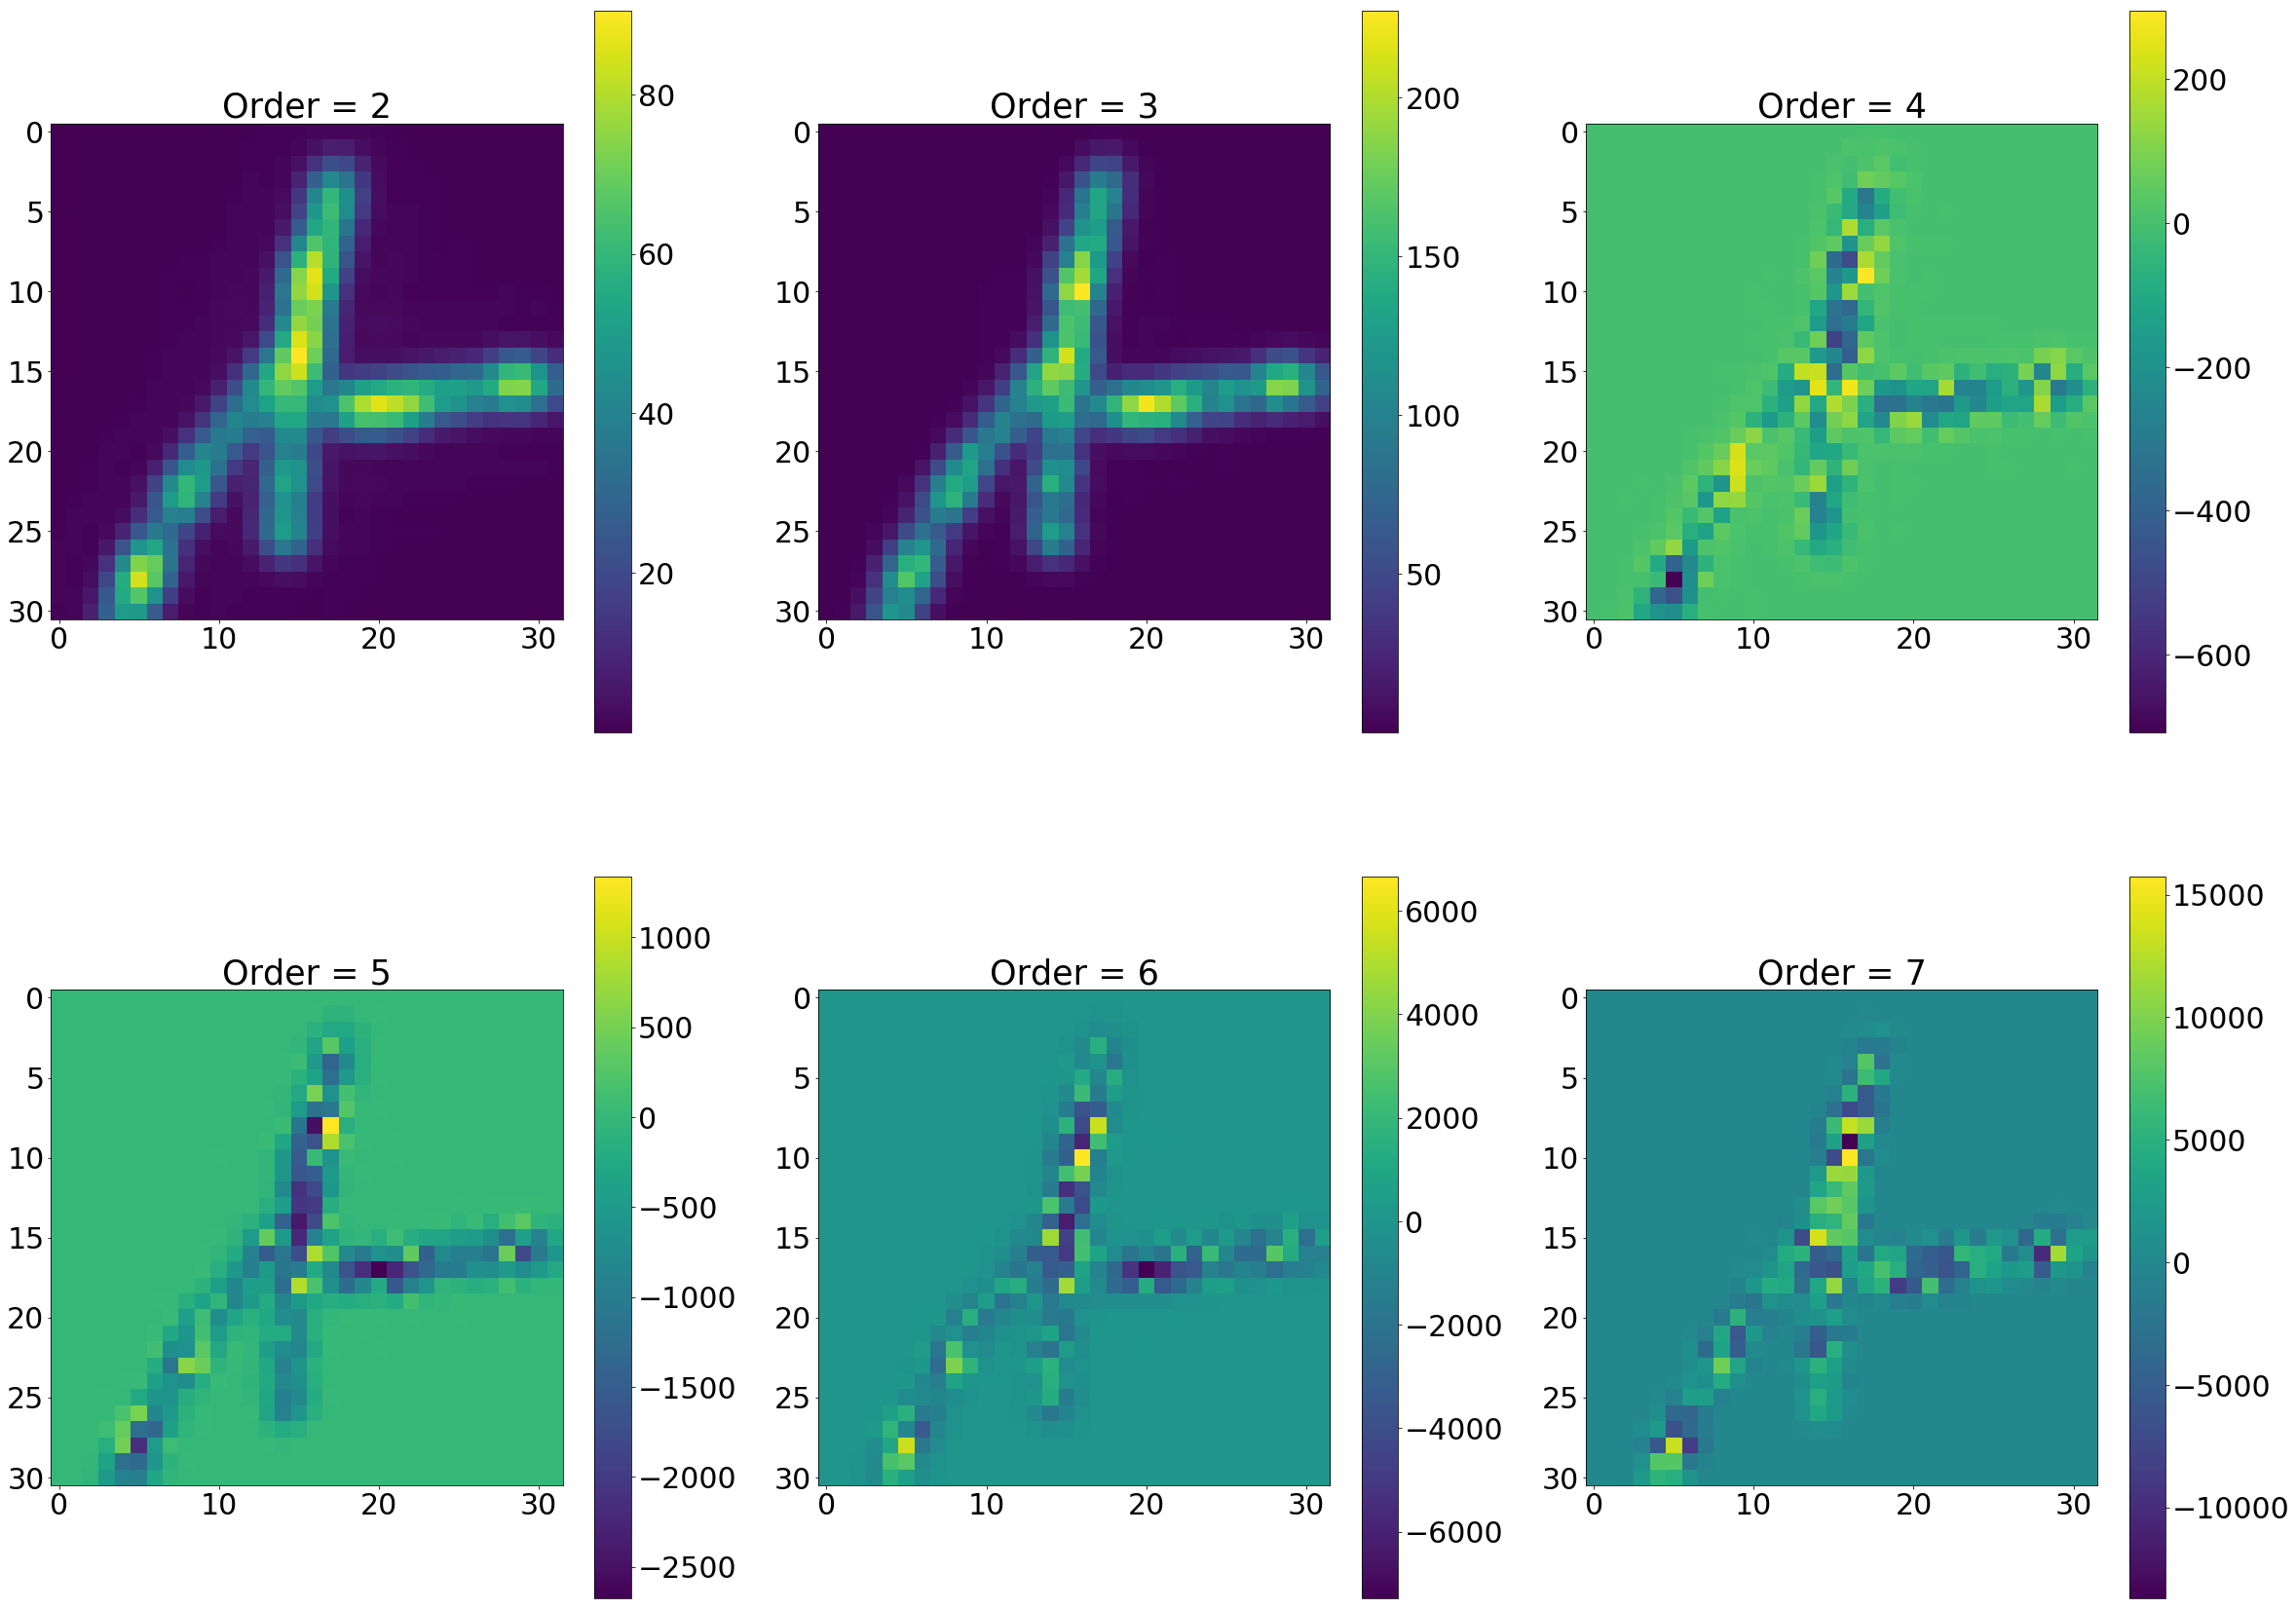

In [5]:
# calcualte the cumulant images using frames in the range of 0 to 2000 (2000 frames in total)
m_frame2000 = reconstruction.calc_block_moments(filepath, filename, 7, frames=[0,2000])
k_frame2000 = reconstruction.calc_cumulants_from_moments(m_frame2000)

# visualize the calculate cumulants using frames in the range of 0 to 2000 (2000 frames in total)
check_cumulants(k_frame2000)

[==============================] 100.0%



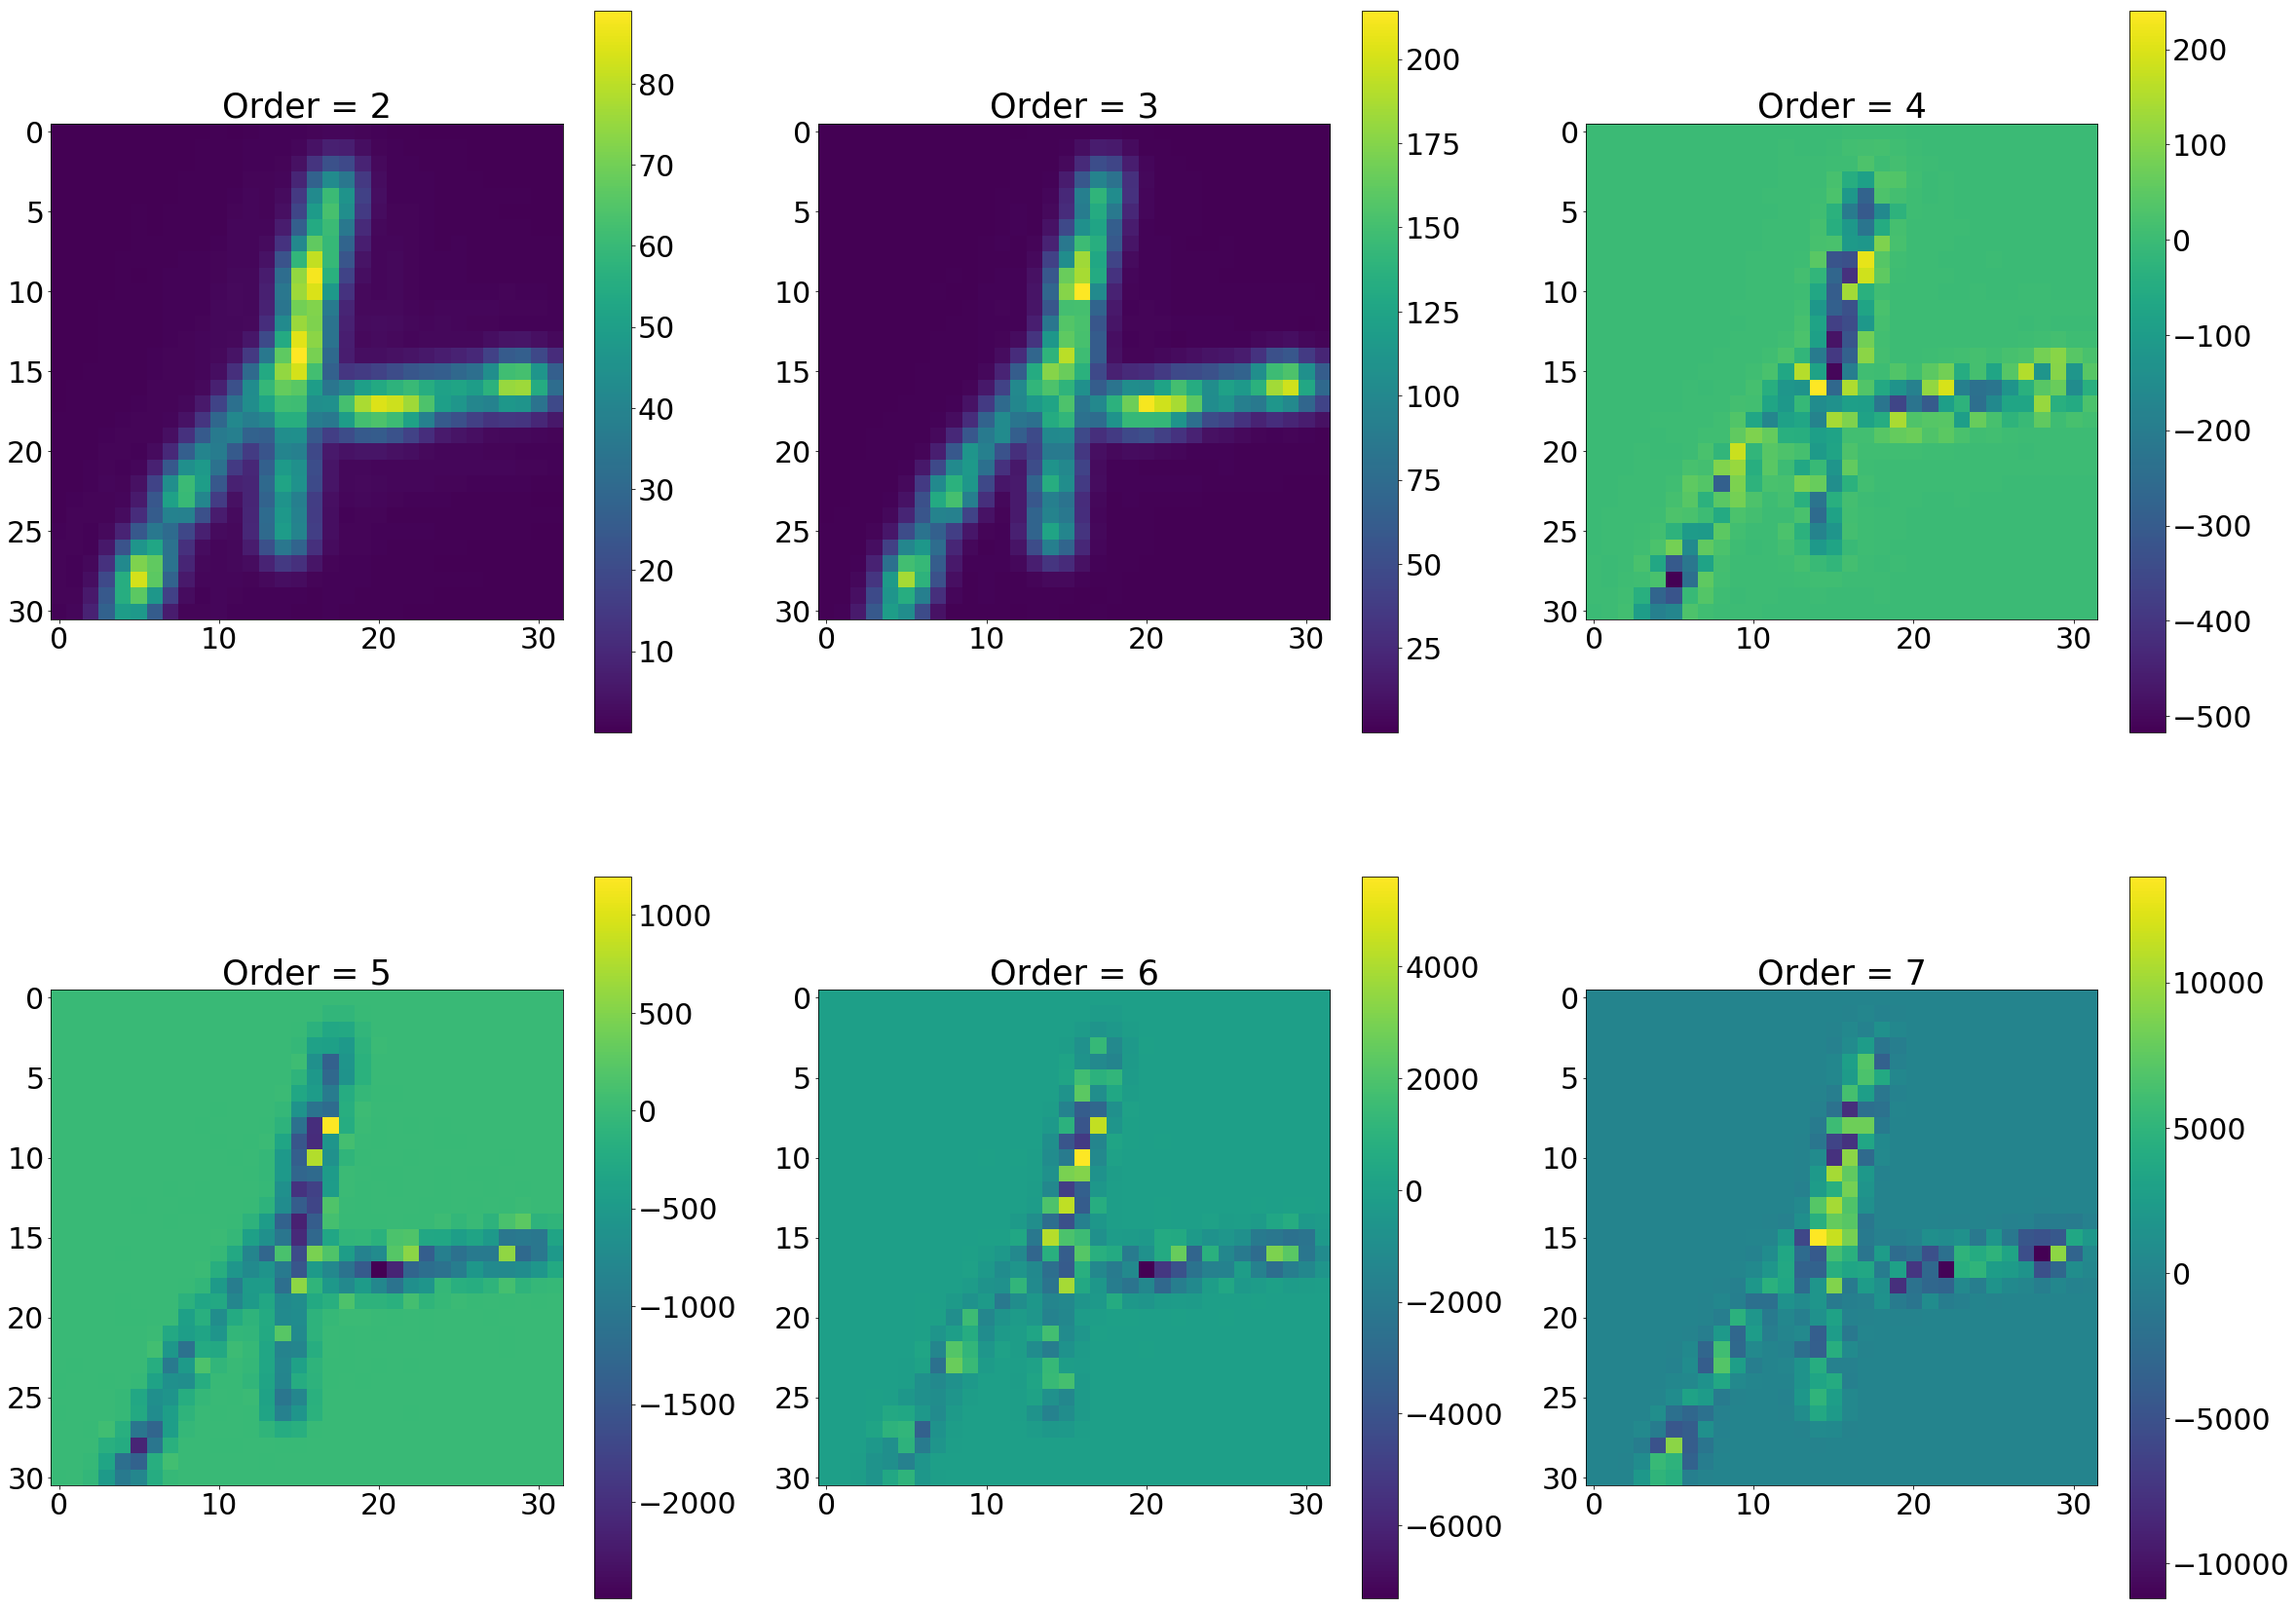

In [6]:
# calcualte the cumulant images using frames in the range of 0 to 3000 (3000 frames in total)
m_frame3000 = reconstruction.calc_block_moments(filepath, filename, 7, frames=[0,3000])
k_frame3000 = reconstruction.calc_cumulants_from_moments(m_frame3000)

# visualize the calculate cumulants using frames in the range of 0 to 3000 (3000 frames in total)
check_cumulants(k_frame3000)

In [7]:
# save all cumulants
from numpy import save
all_cumulants = []
frame_lst = list(range(1000, 4000, 1000))
for i in range(3):
    x = eval(compile("k_frame" + str(frame_lst[i]), "<string>", "eval"))
    all_cumulants.append(x)
save('../sampledata/simulations/convergence_demo/frame1000_3000.npy', all_cumulants)